In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import csv
import shapely
from fiona import crs

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [16]:
shp = gp.GeoDataFrame.from_file('../data/shapefile/nycb2010.shp')
shp['BoroCode'] = shp['BoroCode'].astype(int)
tracts = shp.groupby(['BoroCode', 'CT2010'])

ids = []
geo = []

counties = [None, '061', '005', '047', '081', '085']

for (borocode, tract_id), b in tracts:
    ids.append(counties[borocode] + tract_id)
    geo.append(shapely.ops.cascaded_union(b['geometry']))
    
tracts_shp = gp.GeoDataFrame({'h_county_tract': ids, 'geometry': geo})

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.



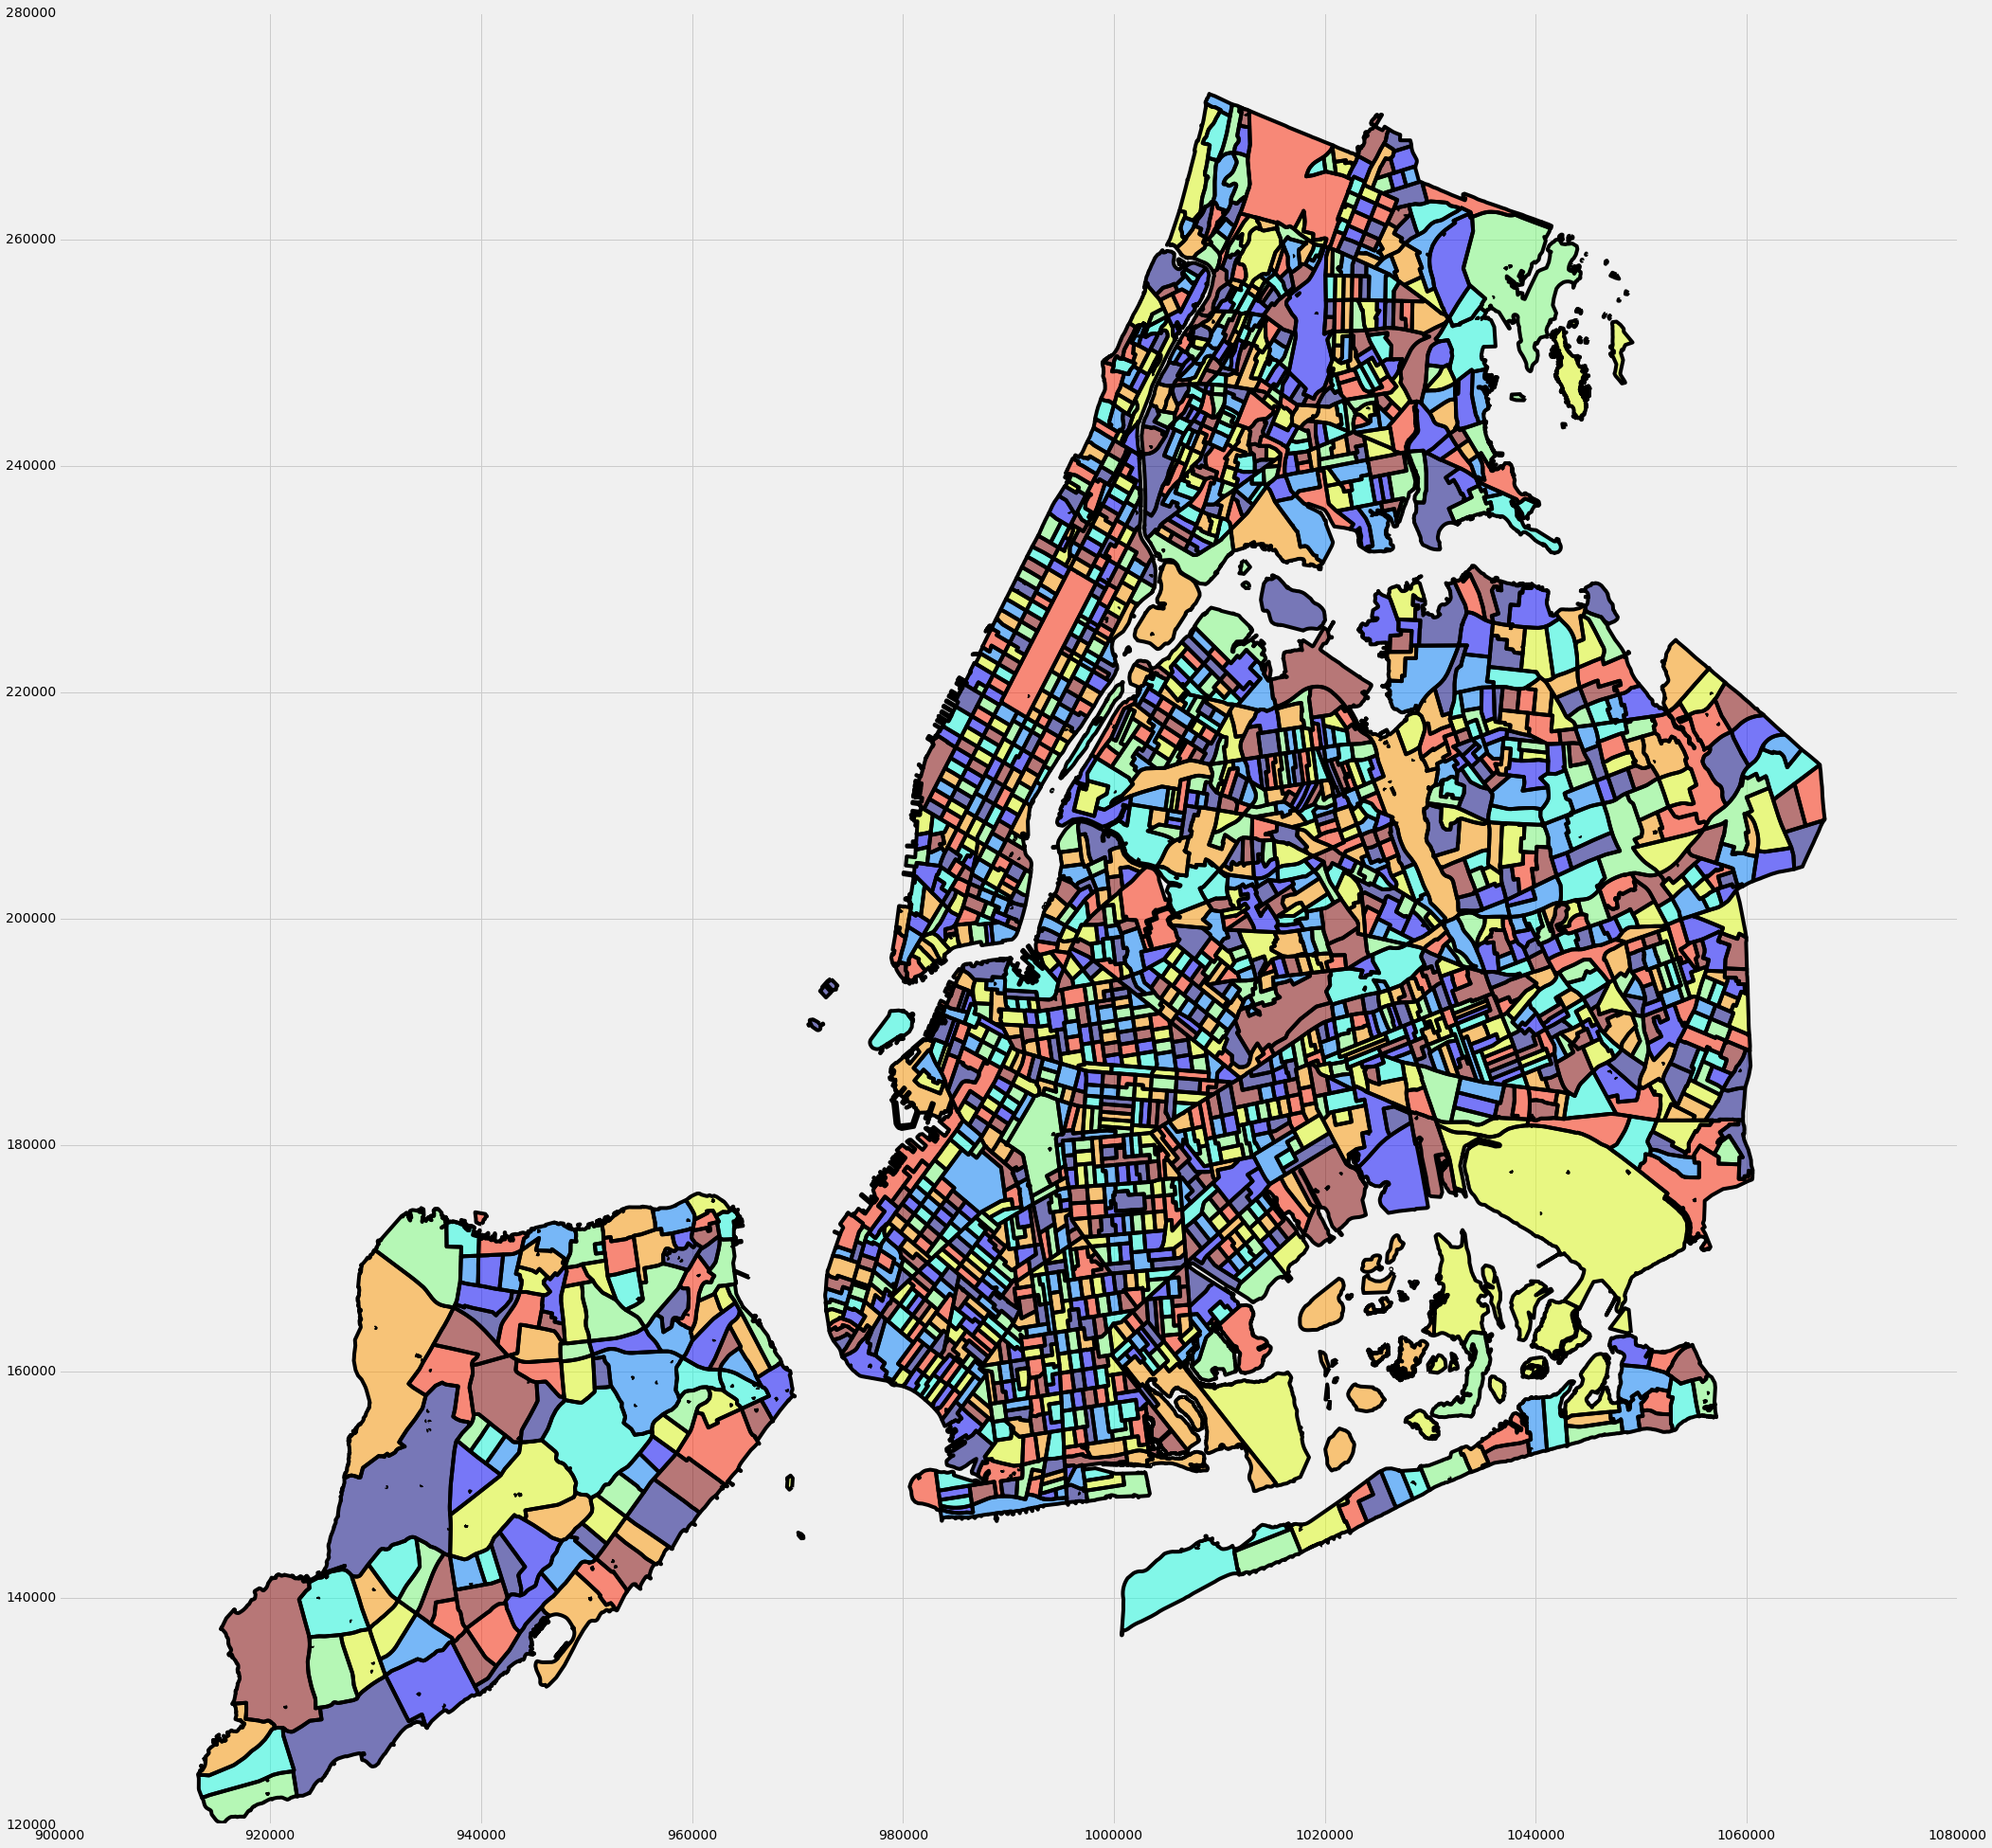

In [5]:
figure, ax = pl.subplots(figsize=(32,32))
tracts_shp.plot(axes=ax)

In [12]:
shp

BCTCB2010  BoroCode       BoroName CB2010  CT2010       Shape_Area  \
0      50009001000         5  Staten Island   1000  000900    244589.603884   
1      50020011000         5  Staten Island   1000  002001    111006.286826   
2      50027001000         5  Staten Island   1000  002700    150406.784296   
3      50040001000         5  Staten Island   1000  004000    141296.561149   
4      50047001000         5  Staten Island   1000  004700   1058268.032180   
5      50064001000         5  Staten Island   1000  006400    200784.983607   
6      50074001000         5  Staten Island   1000  007400    139084.016712   
7      50075001000         5  Staten Island   1000  007500    123560.515383   
8      50077001000         5  Staten Island   1000  007700    205770.958021   
9      50112011000         5  Staten Island   1000  011201    196112.284882   
10     50112021000         5  Staten Island   1000  011202     92737.758773   
11     50114011000         5  Staten Island   1000  011401     66684.087521   
12     50114021000         5  Staten Island   1000  011402    183061.337294   
13     50121001000         5  Staten Island   1000  012100    170250.758542   
14     50122001000         5  Staten Island   1000  012200    139819.271441   
15     50125001000         5  Staten Island   1000  012500    215177.966984   
16     50128041000         5  Staten Island   1000  012804   2184278.143010   
17     50132011000         5  Staten Island   1000  013201    880690.006956   
18     50133011000         5  Staten Island   1000  013301    721784.659017   
19     50133021000         5  Staten Island   1000  013302    210382.022092   
20     50134001000         5  Staten Island   1000  013400     43232.191142   
21     50138001000         5  Staten Island   1000  013800    110567.399891   
22     50141001000         5  Staten Island   1000  014100    419768.556855   
23     50146051000         5  Staten Island   1000  014605    159883.069226   
24     50146071000         5  Staten Island   1000  014607    305282.145602   
25     50146081000         5  Staten Island   1000  014608    400307.576704   
26     50156031000         5  Staten Island   1000  015603    164263.488519   
27     50169011000         5  Staten Island   1000  016901    203357.944568   
28     50170051000         5  Staten Island   1000  017005    121457.459318   
29     50170081000         5  Staten Island   1000  017008    169009.810828   
...            ...       ...            ...    ...     ...              ...   
38767  20276001000         2          Bronx   1000  027600  11763838.617300   
38768  20274011003         2          Bronx   1003  027401    200709.518636   
38769  30192002007         3       Brooklyn   2007  019200     82222.234653   
38770  30118002002         3       Brooklyn   2002  011800    167425.115690   
38771  30122003002         3       Brooklyn   3002  012200    162652.731654   
38772  30122003004         3       Brooklyn   3004  012200    169789.901867   
38773  30122003005         3       Brooklyn   3005  012200    151988.559412   
38774  30192002010         3       Brooklyn   2010  019200     31328.738242   
38775  30192002011         3       Brooklyn   2011  019200     64177.808566   
38776  30192002006         3       Brooklyn   2006  019200     52280.577044   
38777  30192002008         3       Brooklyn   2008  019200    272845.892849   
38778  30118002005         3       Brooklyn   2005  011800    186490.264003   
38779  30118001003         3       Brooklyn   1003  011800    159217.527190   
38780  30118001004         3       Brooklyn   1004  011800    187434.604625   
38781  30118002003         3       Brooklyn   2003  011800    238870.397983   
38782  30118002004         3       Brooklyn   2004  011800    422124.802557   
38783  20297002005         2          Bronx   2005  029700    161972.003572   
38784  20293024006         2          Bronx   4006  029302    170277.483722   
38785  20293024007         2          Bronx   4007  029302 

In [13]:
tracts_shp

block                                           geometry
0     061000100  (POLYGON ((972081.7880249023 190733.4670410156...
1     061000201  POLYGON ((988504.1384277344 198118.3380126953,...
2     061000202  (POLYGON ((989149.298828125 196328.6047973633,...
3     061000500  (POLYGON ((981219.0557861328 188655.3157958984...
4     061000600  POLYGON ((987978.8082275391 197698.2456054688,...
5     061000700  (POLYGON ((984943.4877929688 194173.7781982422...
6     061000800  POLYGON ((986494.1445922852 197775.8300170898,...
7     061000900  (POLYGON ((984175.4826049805 192471.2318115234...
8     061001001  POLYGON ((991128.2537841797 199590.250793457, ...
9     061001002  POLYGON ((990784.524230957 199725.3294067383, ...
10    061001200  POLYGON ((989934.2239990234 199730.8380126953,...
11    061001300  POLYGON ((980015.6190185547 196065.4348144531,...
12    061001401  POLYGON ((987808.0374145508 199519.9393920898,...
13    061001402  POLYGON ((988536.641784668 200278.5239868164, ...
14    061001501  (POLYGON ((985630.4199829102 195452.2407836914...
15    061001502  (POLYGON ((985598.0048217773 195388.9349975586...
16    061001600  POLYGON ((986961.1856079102 199553.6431884766,...
17    061001800  POLYGON ((985960.9514160156 200915.9797973633,...
18    061002000  POLYGON ((991251.4688110352 201170.6185913086,...
19    061002100  POLYGON ((982004.4796142578 198675.3641967773,...
20    061002201  POLYGON ((989955.9202270508 201106.408996582, ...
21    061002202  POLYGON ((990149.0728149414 201586.3591918945,...
22    061002400  (POLYGON ((993355.8920288086 200980.1636352539...
23    061002500  POLYGON ((984416.4728393555 197256.5352172852,...
24    061002601  POLYGON ((990406.9036254883 202058.0150146484,...
25    061002602  POLYGON ((990769.8751831055 202714.3290405273,...
26    061002700  POLYGON ((985096.3008422852 198703.431640625, ...
27    061002800  POLYGON ((991133.9298095703 203369.9053955078,...
28    061002900  POLYGON ((983894.4169921875 197946.4747924805,...
29    061003001  POLYGON ((988552.8358154297 201677.6647949219,...
...         ...                                                ...
2136  085020801  POLYGON ((924562.075012207 136598.2767944336, ...
2137  085020803  POLYGON ((926618.6408081055 130719.3375854492,...
2138  085020804  POLYGON ((928852.3666381836 131775.9692382813,...
2139  085021300  POLYGON ((943786.3292236328 169178.9935913086,...
2140  085022300  (POLYGON ((939997.0946044922 173013.5790405273...
2141  085022600  POLYGON ((922026.5178222656 128149.0079956055,...
2142  085022800  POLYGON ((937062.4694213867 143742.5911865234,...
2143  085023100  POLYGON ((940758.2216186523 167401.4088134766,...
2144  085023900  POLYGON ((943527.1661987305 166983.4863891602,...
2145  085024401  POLYGON ((917698.2913818359 123460.0216064453,...
2146  085024402  POLYGON ((918517.9154052734 121574.6083984375,...
2147  085024700  POLYGON ((945030.2421875 166864.2968139648, 94...
2148  085024800  POLYGON ((913368.5969848633 124740.8972167969,...
2149  085025100  POLYGON ((941570.7430419922 162357.0916137695,...
2150  085027301  POLYGON ((943210.4050292969 153737.8375854492,...
2151  085027302  POLYGON ((944605.123840332 153787.1791992188, ...
2152  085027702  POLYGON ((940031.8090209961 149463.3251953125,...
2153  085027704  POLYGON ((943247.1141967773 152449.342590332, ...
2154  085027705  POLYGON ((940231.6149902344 152012.6704101563,...
2155  085027706  POLYGON ((939459.5792236328 153569.674987793, ...
2156  085027900  POLYGON ((945049.0692138672 147856.9963989258,...
2157  085029102  POLYGON ((930552.5142211914 152480.9010009766,...
2158  085029103  POLYGON ((939089.0505981445 155420.5189819336,...
2159  085029104  POLYGON ((941494.5062255859 161089.708984375, ...
2160  085030301  POLYGON ((941798.5936279297 163562.8734130859,...
2161  085030302  POLYGON ((942246.3092041016 165688.2529907227,...
2162  085031901  POLYGON ((939719.8115844727 168205.2556152344,...
2163  085031902  POLYGON ((937551.8041992188 170992.56939

In [17]:
commute = pd.read_csv('../data/csv/tract_commute_summary.csv', dtype={'h_county_tract': str})

In [19]:
merged = tracts_shp.merge(commute, on='h_county_tract')

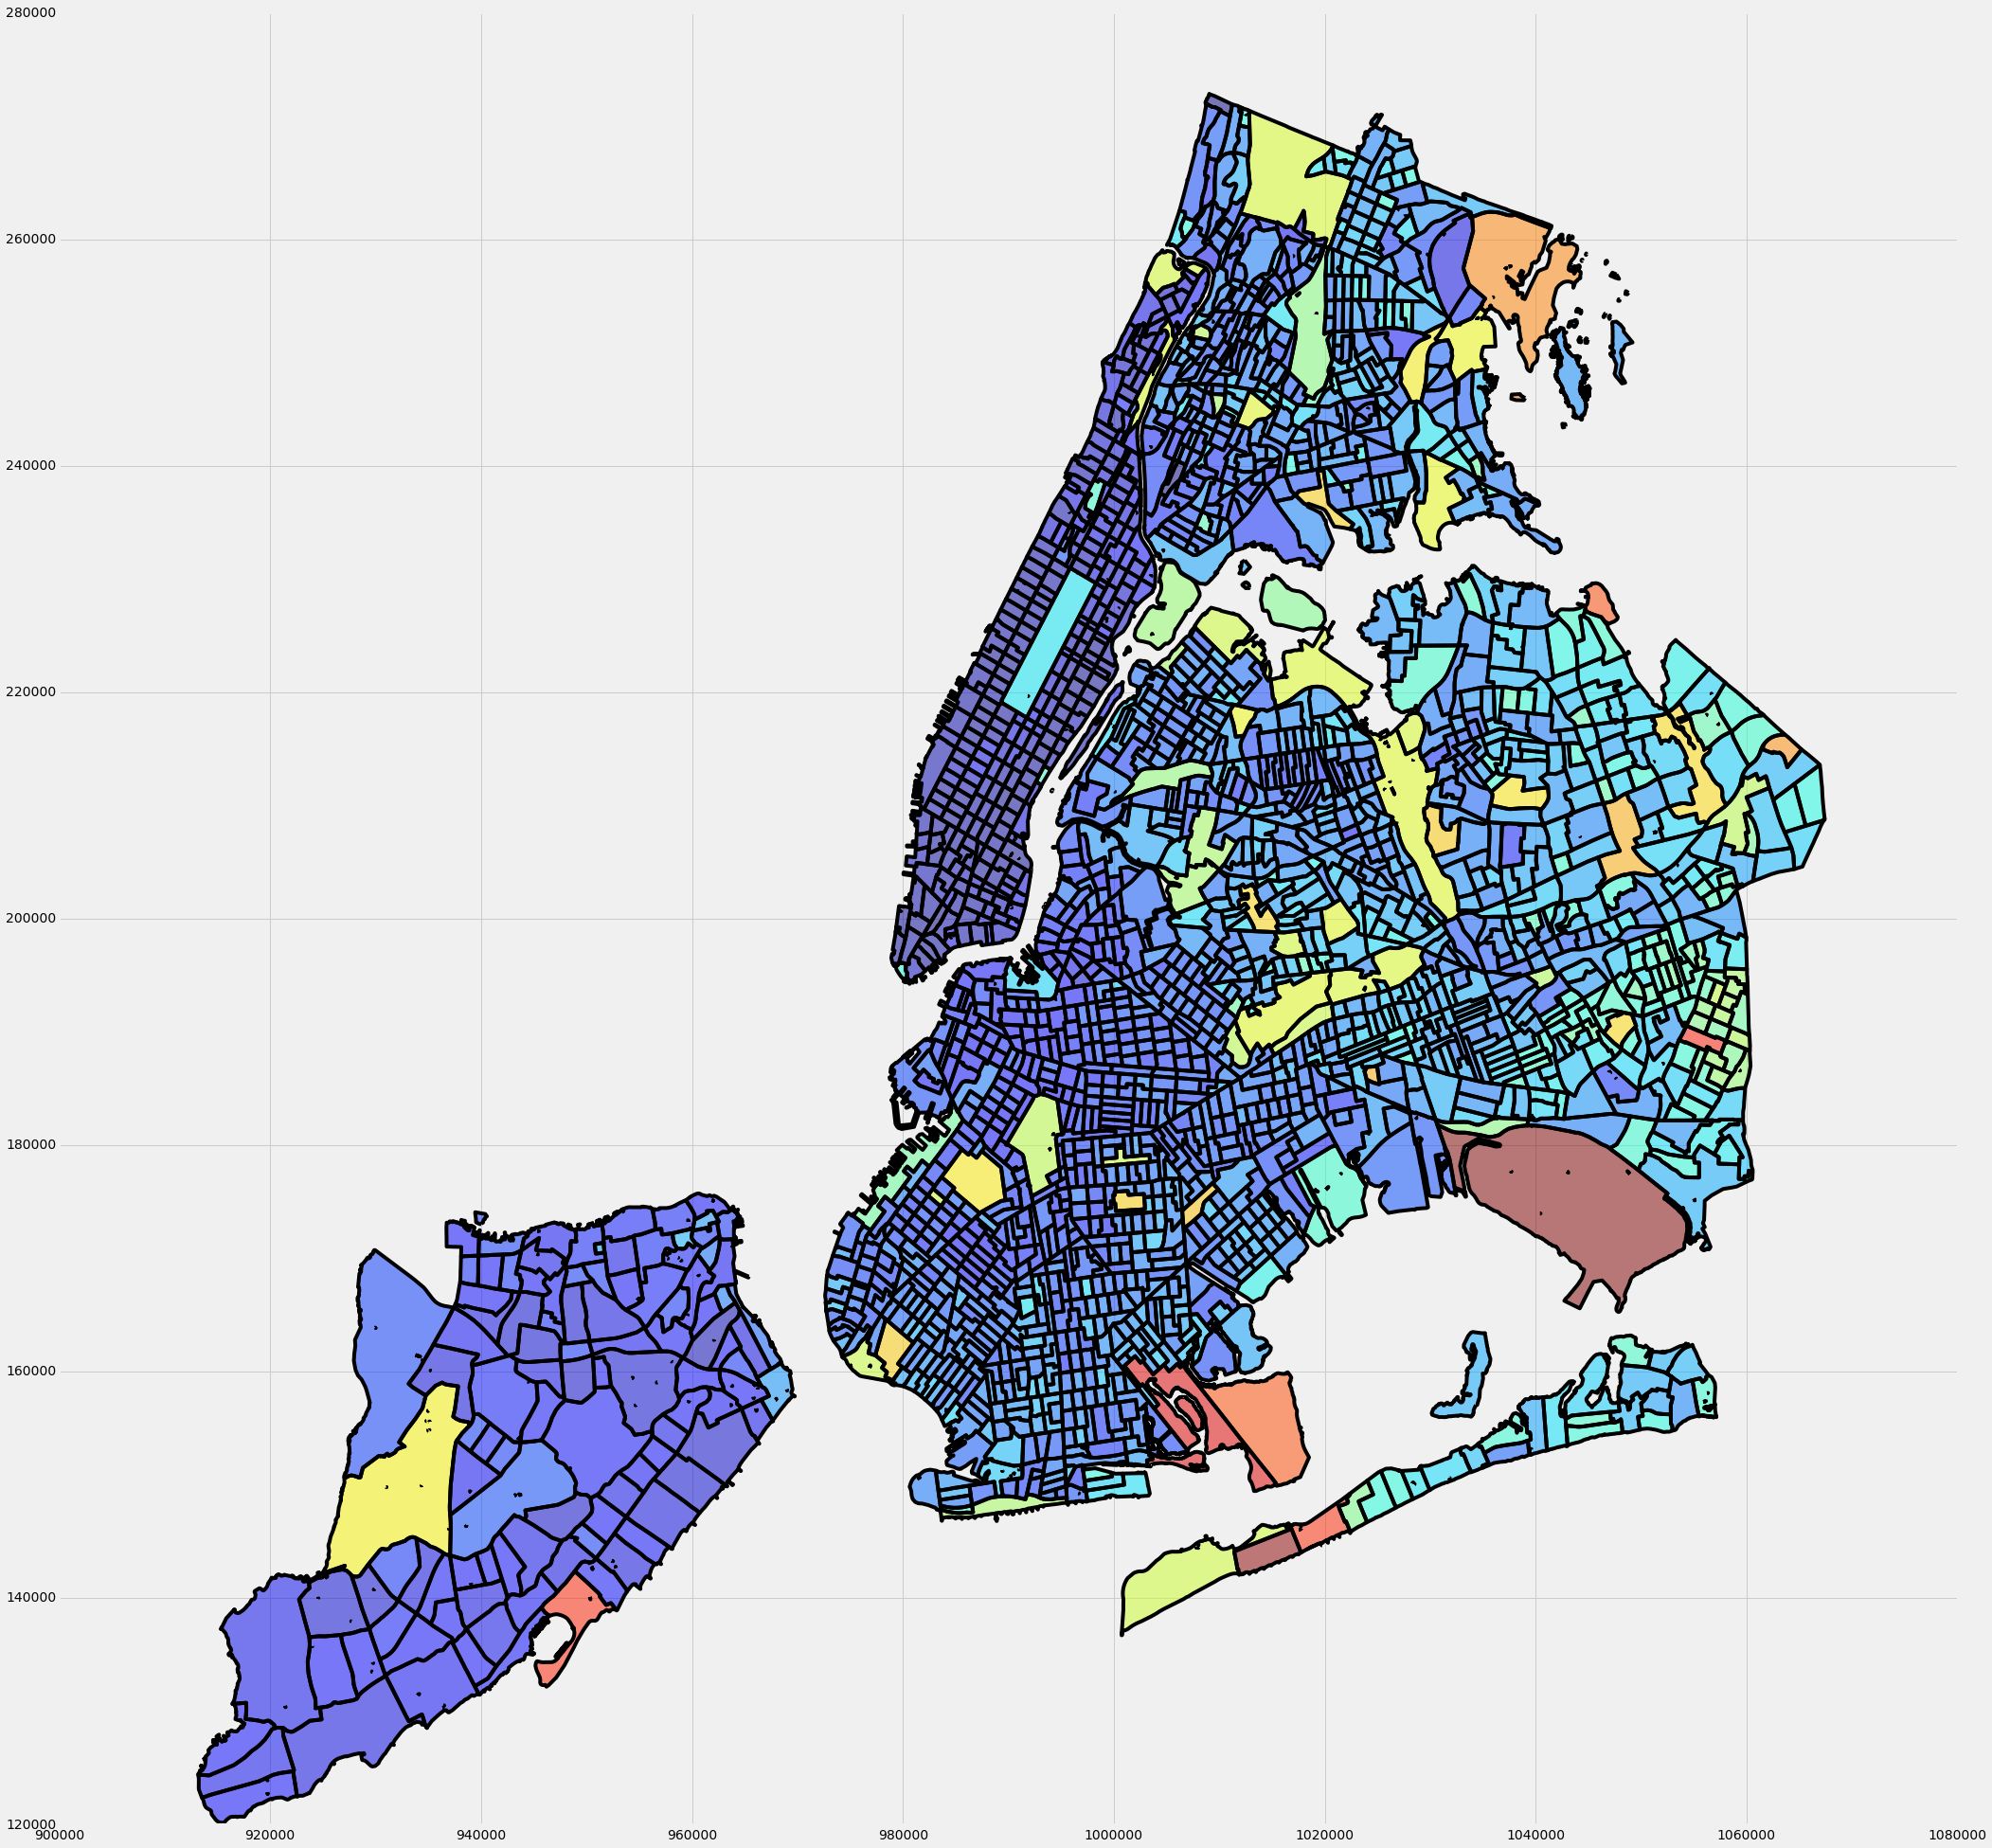

In [22]:
figure, ax = pl.subplots(figsize=(32,32))
merged.plot(axes=ax, column='average_commute_time')

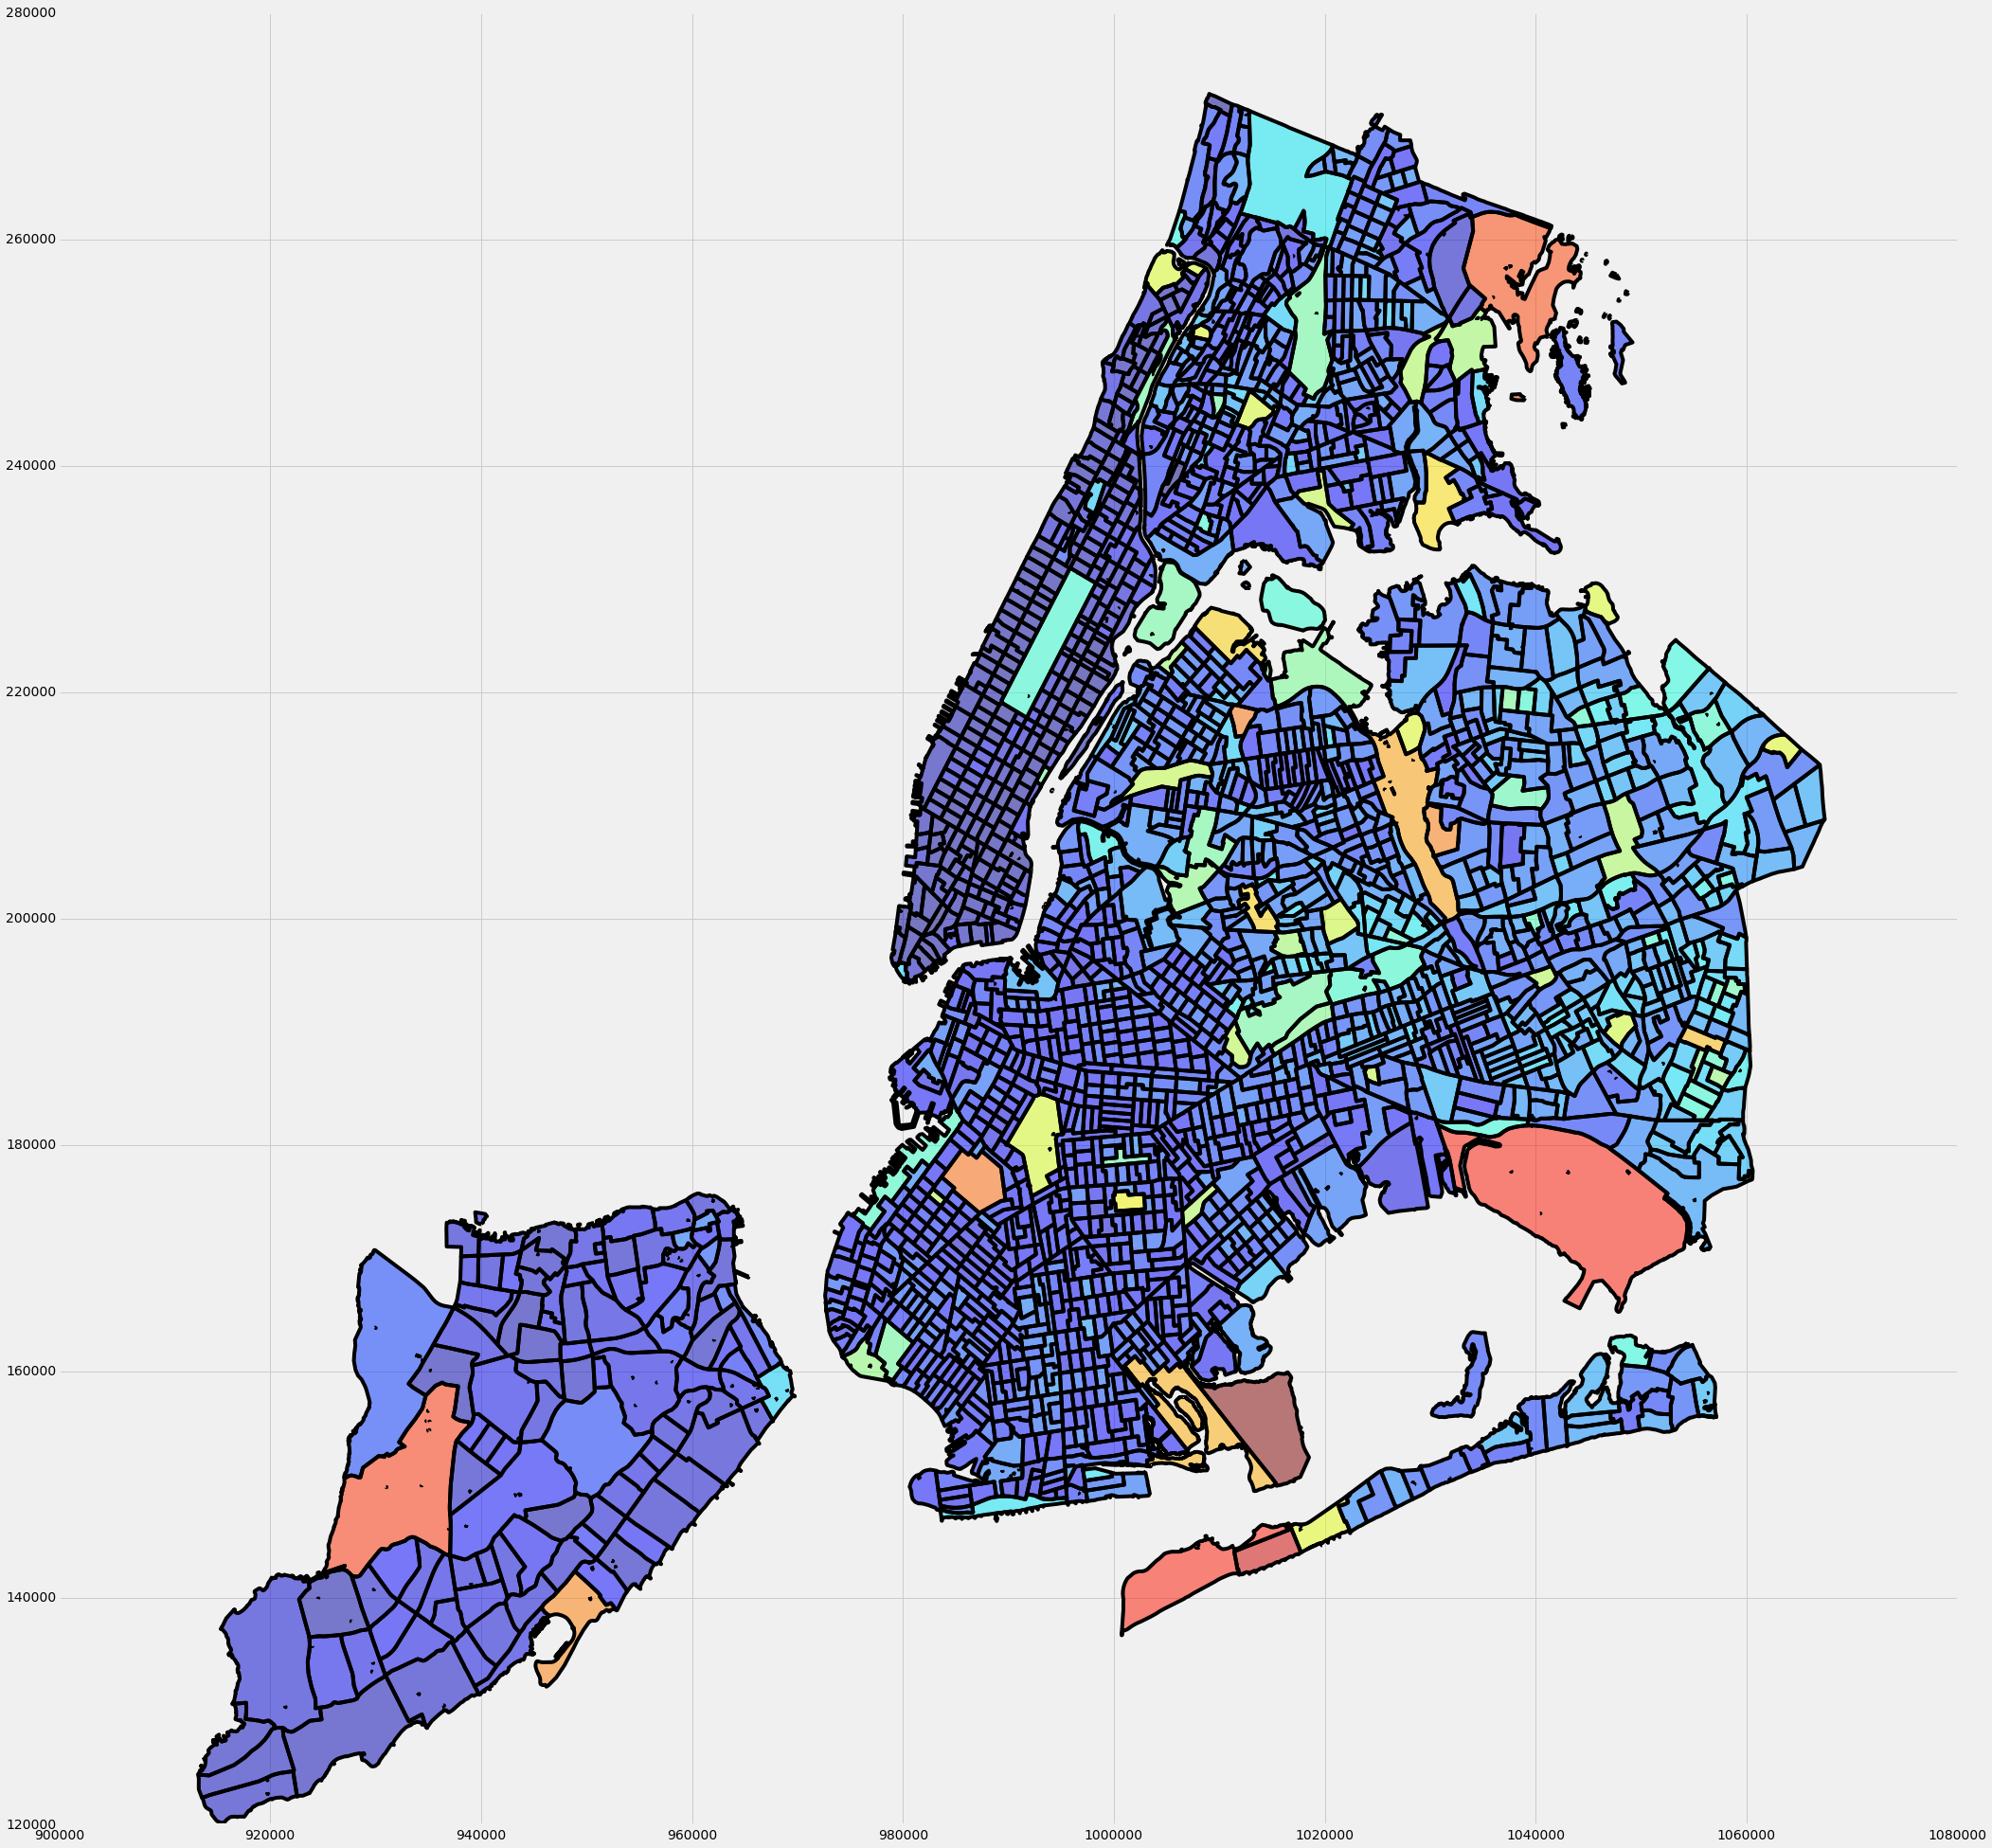

In [24]:
figure, ax = pl.subplots(figsize=(32,32))
merged.plot(axes=ax, column='average_walk_distance')